In [1]:
import torch
import pandas as pd

from torch import nn
from torch.utils.data import DataLoader

from utils.dataset import MovieDataset
from utils.models import MLPClassifier


torch.manual_seed(4)

# Set up

In [11]:
from utils.loops import train_loop, eval_loop

def run_epochs(
    epochs: int,
    model, loss_fn,
    optimizer, train_loader,
    test_loader,
    use_gpu: bool = False
):
    epoch_loss = {
        'train': [],
        'eval': []
    }
    for epoch in range(epochs):
        print(f"Epoch {epoch}")
        losses = train_loop(model, loss_fn,
            optimizer, train_loader,
            use_gpu
        )

        print(f"  Train loss: {sum(losses) / len(losses)}")
        eval_losses = eval_loop(model,
            loss_fn, test_loader,
            use_gpu
        )

        print(f"  Eval loss: {sum(eval_losses) / len(eval_losses)}\n")

        epoch_loss['train'].append(losses)
        epoch_loss['eval'].append(eval_losses)
    return epoch_loss

# Load Data and model

In [ ]:
dfs = [
    pd.read_csv('../dataset/train_data/train_data.csv', index_col=0),
    pd.read_csv('../dataset/train_data/test_data.csv', index_col=0),
]

train_data = MovieDataset(dfs[0])
test_data = MovieDataset(dfs[1])

In [13]:
batch_size = 16

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [14]:
mlp_model = MLPClassifier(768 + train_data[0][0].shape[0])
mse_loss = nn.MSELoss()
adam_opt = torch.optim.Adam(mlp_model.parameters(), lr=1e-5)

# Training

In [15]:
epochs = 50
global_loss = {
    'train': [],
    'eval': []
}
gpu_avail = torch.cuda.is_available()
if gpu_avail: mlp_model.cuda()

In [25]:
loss = run_epochs(
    epochs, mlp_model,
    mse_loss, adam_opt,
    train_loader, test_loader,
    gpu_avail
)

global_loss['train'].extend(loss['train'])
global_loss['eval'].extend(loss['eval'])

Epoch 0


100%|██████████| 50/50 [00:04<00:00, 12.37it/s, Loss: 0.034244850277900696]


  Train loss: 0.059836446717381475
  Eval loss: 0.1393874270411638

Epoch 1


100%|██████████| 50/50 [00:04<00:00, 11.86it/s, Loss: 0.058887798339128494]


  Train loss: 0.05652341961860657
  Eval loss: 0.10090537655812043

Epoch 2


100%|██████████| 50/50 [00:04<00:00, 12.23it/s, Loss: 0.05267039313912392]


  Train loss: 0.057236576601862904
  Eval loss: 0.08670323284772727

Epoch 3


100%|██████████| 50/50 [00:04<00:00, 12.30it/s, Loss: 0.07225903123617172]


  Train loss: 0.05576267223805189
  Eval loss: 0.09478325855273467

Epoch 4


100%|██████████| 50/50 [00:04<00:00, 12.21it/s, Loss: 0.05098506063222885]


  Train loss: 0.05728974096477032
  Eval loss: 0.14400021158731902

Epoch 5


100%|██████████| 50/50 [00:04<00:00, 12.30it/s, Loss: 0.03887291997671127]


  Train loss: 0.059712219201028344
  Eval loss: 0.0652420985010954

Epoch 6


100%|██████████| 50/50 [00:04<00:00, 12.20it/s, Loss: 0.057218994945287704]


  Train loss: 0.057740143798291683
  Eval loss: 0.09065087712728061

Epoch 7


100%|██████████| 50/50 [00:04<00:00, 12.12it/s, Loss: 0.04890837520360947]


  Train loss: 0.0613102475553751
  Eval loss: 0.11637630199010555

Epoch 8


100%|██████████| 50/50 [00:04<00:00, 12.10it/s, Loss: 0.07819420844316483]


  Train loss: 0.05802607078105211
  Eval loss: 0.08108244119928433

Epoch 9


100%|██████████| 50/50 [00:04<00:00, 11.99it/s, Loss: 0.06606276333332062]


  Train loss: 0.056232524402439595
  Eval loss: 0.22875722096516535

Epoch 10


100%|██████████| 50/50 [00:04<00:00, 12.05it/s, Loss: 0.07402695715427399]


  Train loss: 0.06475750528275967
  Eval loss: 0.24683874616256127

Epoch 11


100%|██████████| 50/50 [00:04<00:00, 11.91it/s, Loss: 0.04935386776924133]


  Train loss: 0.0577823955565691
  Eval loss: 0.15314802470115516

Epoch 12


100%|██████████| 50/50 [00:04<00:00, 12.04it/s, Loss: 0.07087957113981247]


  Train loss: 0.0630341849476099
  Eval loss: 0.13555647977269614

Epoch 13


100%|██████████| 50/50 [00:04<00:00, 12.15it/s, Loss: 0.0524800606071949]


  Train loss: 0.05851764857769012
  Eval loss: 0.06780165462539746

Epoch 14


100%|██████████| 50/50 [00:04<00:00, 12.11it/s, Loss: 0.02570108324289322]


  Train loss: 0.05356591537594795
  Eval loss: 0.3186010821507527

Epoch 15


100%|██████████| 50/50 [00:04<00:00, 12.21it/s, Loss: 0.045596640557050705]


  Train loss: 0.05888793870806694
  Eval loss: 0.11745244608475612

Epoch 16


100%|██████████| 50/50 [00:04<00:00, 12.12it/s, Loss: 0.06116817891597748]


  Train loss: 0.056356284730136395
  Eval loss: 0.30229637714532703

Epoch 17


100%|██████████| 50/50 [00:04<00:00, 12.08it/s, Loss: 0.03160820156335831]


  Train loss: 0.06235532458871603
  Eval loss: 0.0834090205339285

Epoch 18


100%|██████████| 50/50 [00:04<00:00, 12.23it/s, Loss: 0.06955762952566147]


  Train loss: 0.06152478642761707
  Eval loss: 0.1478179429586117

Epoch 19


100%|██████████| 50/50 [00:04<00:00, 12.06it/s, Loss: 0.05187118798494339]


  Train loss: 0.058766971342265606
  Eval loss: 0.09706126153469086

Epoch 20


100%|██████████| 50/50 [00:04<00:00, 12.17it/s, Loss: 0.05815704166889191]


  Train loss: 0.056832940354943275
  Eval loss: 0.052079256337422594

Epoch 21


100%|██████████| 50/50 [00:04<00:00, 12.36it/s, Loss: 0.1240413561463356]


  Train loss: 0.061108984835445884
  Eval loss: 0.08980846147124584

Epoch 22


100%|██████████| 50/50 [00:04<00:00, 11.91it/s, Loss: 0.03059696964919567]


  Train loss: 0.06557616416364909
  Eval loss: 0.07570873487454194

Epoch 23


100%|██████████| 50/50 [00:04<00:00, 11.97it/s, Loss: 0.051777325570583344]


  Train loss: 0.06047871932387352
  Eval loss: 0.14430646741619477

Epoch 24


100%|██████████| 50/50 [00:04<00:00, 12.16it/s, Loss: 0.03582478687167168]


  Train loss: 0.059065860994160176
  Eval loss: 0.05444358976987692

Epoch 25


100%|██████████| 50/50 [00:04<00:00, 11.94it/s, Loss: 0.028543252497911453]


  Train loss: 0.06803877774626016
  Eval loss: 0.06336840270803525

Epoch 26


100%|██████████| 50/50 [00:04<00:00, 12.02it/s, Loss: 0.07836463302373886]


  Train loss: 0.06298263672739267
  Eval loss: 0.07099680803143062

Epoch 27


100%|██████████| 50/50 [00:04<00:00, 12.15it/s, Loss: 0.07519644498825073]


  Train loss: 0.05998222716152668
  Eval loss: 0.060863830435734526

Epoch 28


100%|██████████| 50/50 [00:04<00:00, 11.88it/s, Loss: 0.1347123235464096]


  Train loss: 0.06225472316145897
  Eval loss: 0.1061716561134045

Epoch 29


100%|██████████| 50/50 [00:04<00:00, 12.02it/s, Loss: 0.0650484710931778]


  Train loss: 0.05456104673445225
  Eval loss: 0.3319969108471504

Epoch 30


100%|██████████| 50/50 [00:04<00:00, 11.88it/s, Loss: 0.09661978483200073]


  Train loss: 0.0607309490069747
  Eval loss: 0.05329034004646998

Epoch 31


100%|██████████| 50/50 [00:04<00:00, 11.91it/s, Loss: 0.10561878234148026]


  Train loss: 0.05578582903370261
  Eval loss: 0.04924165901656334

Epoch 32


100%|██████████| 50/50 [00:04<00:00, 12.11it/s, Loss: 0.03985291346907616]


  Train loss: 0.05980994969606399
  Eval loss: 0.1470355592094935

Epoch 33


100%|██████████| 50/50 [00:04<00:00, 11.84it/s, Loss: 0.04482963681221008]


  Train loss: 0.05666398398578167
  Eval loss: 0.0585412487674218

Epoch 34


100%|██████████| 50/50 [00:04<00:00, 12.11it/s, Loss: 0.019426576793193817]


  Train loss: 0.058902172073721885
  Eval loss: 0.06117232459095808

Epoch 35


100%|██████████| 50/50 [00:04<00:00, 12.22it/s, Loss: 0.044081151485443115]


  Train loss: 0.054903394691646096
  Eval loss: 0.1514012057047624

Epoch 36


100%|██████████| 50/50 [00:04<00:00, 11.92it/s, Loss: 0.047160554677248]


  Train loss: 0.053275990933179855
  Eval loss: 0.10258386255456851

Epoch 37


100%|██████████| 50/50 [00:04<00:00, 12.07it/s, Loss: 0.061850614845752716]


  Train loss: 0.06120364248752594
  Eval loss: 0.3104467254418593

Epoch 38


100%|██████████| 50/50 [00:04<00:00, 12.07it/s, Loss: 0.05186093598604202]


  Train loss: 0.05422890331596136
  Eval loss: 0.07869204219717246

Epoch 39


100%|██████████| 50/50 [00:04<00:00, 12.10it/s, Loss: 0.057096224278211594]


  Train loss: 0.05805411390960216
  Eval loss: 0.06569846175037898

Epoch 40


100%|██████████| 50/50 [00:04<00:00, 12.06it/s, Loss: 0.06487929075956345]


  Train loss: 0.05623913902789354
  Eval loss: 0.09389839550623527

Epoch 41


100%|██████████| 50/50 [00:04<00:00, 11.77it/s, Loss: 0.042071375995874405]


  Train loss: 0.05379408240318298
  Eval loss: 0.0621114714214435

Epoch 42


100%|██████████| 50/50 [00:04<00:00, 12.00it/s, Loss: 0.10191808640956879]


  Train loss: 0.05638916190713644
  Eval loss: 0.05745430032794292

Epoch 43


100%|██████████| 50/50 [00:04<00:00, 11.91it/s, Loss: 0.02580544725060463]


  Train loss: 0.059956233613193036
  Eval loss: 0.11527574721437234

Epoch 44


100%|██████████| 50/50 [00:04<00:00, 11.85it/s, Loss: 0.045069724321365356]


  Train loss: 0.05488177761435509
  Eval loss: 0.28605837661486405

Epoch 45


100%|██████████| 50/50 [00:04<00:00, 11.96it/s, Loss: 0.038468509912490845]


  Train loss: 0.05662586763501167
  Eval loss: 0.255159437083281

Epoch 46


100%|██████████| 50/50 [00:04<00:00, 12.07it/s, Loss: 0.03577224910259247]


  Train loss: 0.0591502158343792
  Eval loss: 0.12044385591378579

Epoch 47


100%|██████████| 50/50 [00:04<00:00, 12.00it/s, Loss: 0.0573364682495594]


  Train loss: 0.05697393923997879
  Eval loss: 0.1449292697585546

Epoch 48


100%|██████████| 50/50 [00:04<00:00, 11.94it/s, Loss: 0.06228351220488548]


  Train loss: 0.05536668010056019
  Eval loss: 0.09673124895646022

Epoch 49


100%|██████████| 50/50 [00:04<00:00, 11.82it/s, Loss: 0.05491656810045242]


  Train loss: 0.05900761473923922
  Eval loss: 0.16024444051660025



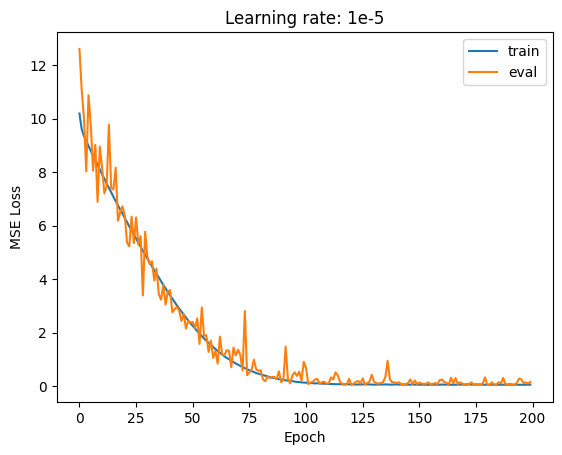

In [26]:
import matplotlib.pyplot as plt

plt.title('Learning rate: 1e-5')
plt.plot([sum(loss) / len(loss) for loss in global_loss['train']], label='train')
plt.plot([sum(loss) / len(loss) for loss in global_loss['eval']], label='eval')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend();

In [ ]:
checkpoint = {
    'model': mlp_model.state_dict(),
    'optimizer': adam_opt.state_dict(),
    'loss': global_loss,
    'batch_size': batch_size,
    'lr': 1e-5
}

torch.save(checkpoint, '../model_cehckpoints/mlp_model_cp3.tar')